In [1]:
import pandas as pd

from dlbn.estimators import *
from dlbn.graph import *
from dlbn.expert import Expert

In [2]:
data = pd.read_csv(r"../datasets/Asian.csv", )
data[data == 'no'] = 0
data[data == 'yes'] = 1
data = data.astype(int)[:2000]
data

,smoke,bronc,lung,asia,tub,either,dysp,xray
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1995,1,1,0,0,0,0,1,0
1996,0,0,0,0,0,0,0,0
1997,1,0,0,0,0,0,0,0
1998,1,1,1,0,0,1,1,0


In [3]:
ground_truth = DAG()
ground_truth.read_excel(r"../datasets/Asian net.xlsx")
ground_truth.edges

OutEdgeView([('asia', 'tub'), ('tub', 'either'), ('either', 'dysp'), ('either', 'xray'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp')])

Hill climbing:   0%|          | 0/1000 [00:00<?, ?it/s]

=========Estimator Information=========

        ·▄▄▄▄    ▄▄▌    ▄▄▄▄·    ▐ ▄ 
        ██▪ ██   ██•    ▐█ ▀█▪  •█▌▐█
        ▐█· ▐█▌  ██▪    ▐█▀▀█▄  ▐█▐▐▌
        ██. ██   ▐█▌▐▌  ██▄▪▐█  ██▐█▌
        ▀▀▀▀▀•   .▀▀▀   ·▀▀▀▀   ▀▀ █▪
        
   smoke  bronc  lung  asia  tub  either  dysp  xray
0      0      0     0     0    0       0     1     0
1      0      0     0     0    0       0     0     0
2      1      1     0     0    0       0     1     0
3      1      1     0     0    0       0     0     0
4      1      1     0     0    0       0     1     0
Recover the BN with 8 variables


Hill climbing:   1%|          | 11/1000 [00:03<05:05,  3.24it/s]


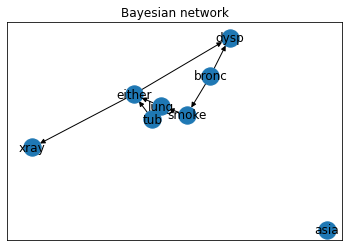

In [4]:
hc_est = HC(data,BIC_score)
hc_est.run()
hc_est.show()

In [5]:
hc_est.result_dag.edges

OutEdgeView([('smoke', 'lung'), ('bronc', 'dysp'), ('bronc', 'smoke'), ('lung', 'either'), ('tub', 'either'), ('either', 'xray'), ('either', 'dysp')])

In [6]:
hc_est.result_dag.score(BIC_score,data)

-4649.87220770947

In [7]:
ground_truth-hc_est.result_dag

3

=========Estimator Information=========

        ·▄▄▄▄    ▄▄▌    ▄▄▄▄·    ▐ ▄ 
        ██▪ ██   ██•    ▐█ ▀█▪  •█▌▐█
        ▐█· ▐█▌  ██▪    ▐█▀▀█▄  ▐█▐▐▌
        ██. ██   ▐█▌▐▌  ██▄▪▐█  ██▐█▌
        ▀▀▀▀▀•   .▀▀▀   ·▀▀▀▀   ▀▀ █▪
        
   smoke  bronc  lung  asia  tub  either  dysp  xray
0      0      0     0     0    0       0     1     0
1      0      0     0     0    0       0     0     0
2      1      1     0     0    0       0     1     0
3      1      1     0     0    0       0     0     0
4      1      1     0     0    0       0     1     0
Recover the BN with 8 variables


Adding cost: 100%|██████████| 1024/1024 [00:20<00:00, 50.71it/s]


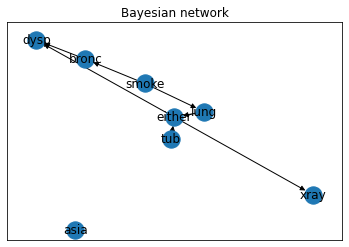

In [8]:
spp_est = SPP(data)
spp_est.run()
spp_est.show()

In [9]:
spp_est.result_dag.edges

OutEdgeView([('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('tub', 'either'), ('either', 'xray'), ('either', 'dysp')])

In [10]:
spp_est.result_dag.score(BIC_score,data)

-4649.87220770947

In [11]:
spp_est.result_dag-ground_truth

1

  1%|          | 12/1000 [00:00<00:08, 111.72it/s]

=========Estimator Information=========

        ·▄▄▄▄    ▄▄▌    ▄▄▄▄·    ▐ ▄ 
        ██▪ ██   ██•    ▐█ ▀█▪  •█▌▐█
        ▐█· ▐█▌  ██▪    ▐█▀▀█▄  ▐█▐▐▌
        ██. ██   ▐█▌▐▌  ██▄▪▐█  ██▐█▌
        ▀▀▀▀▀•   .▀▀▀   ·▀▀▀▀   ▀▀ █▪
        
   smoke  bronc  lung  asia  tub  either  dysp  xray
0      0      0     0     0    0       0     1     0
1      0      0     0     0    0       0     0     0
2      1      1     0     0    0       0     1     0
3      1      1     0     0    0       0     0     0
4      1      1     0     0    0       0     1     0
Recover the BN with 8 variables


100%|██████████| 1000/1000 [00:11<00:00, 90.59it/s]


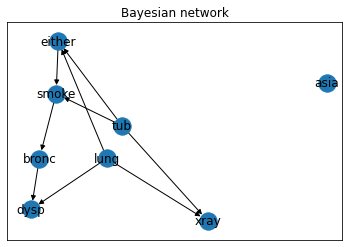

In [12]:
sa_est = SA(data,BIC_score)
sa_est.run()
sa_est.show()

In [13]:
sa_est.result_dag.edges

OutEdgeView([('smoke', 'bronc'), ('bronc', 'dysp'), ('lung', 'xray'), ('lung', 'either'), ('lung', 'dysp'), ('tub', 'xray'), ('tub', 'smoke'), ('tub', 'either'), ('either', 'smoke')])

In [14]:
sa_est.result_dag-ground_truth

9

In [15]:
exp = pd.read_csv(r"../datasets/Asian expert.csv",index_col=0)

In [16]:
expert = Expert(exp)
hc_est = HC(data,Knowledge_fused_score,expert=expert)
hc_est.run()

Hill climbing:   0%|          | 0/1000 [00:00<?, ?it/s]

=========Estimator Information=========

        ·▄▄▄▄    ▄▄▌    ▄▄▄▄·    ▐ ▄ 
        ██▪ ██   ██•    ▐█ ▀█▪  •█▌▐█
        ▐█· ▐█▌  ██▪    ▐█▀▀█▄  ▐█▐▐▌
        ██. ██   ▐█▌▐▌  ██▄▪▐█  ██▐█▌
        ▀▀▀▀▀•   .▀▀▀   ·▀▀▀▀   ▀▀ █▪
        
   smoke  bronc  lung  asia  tub  either  dysp  xray
0      0      0     0     0    0       0     1     0
1      0      0     0     0    0       0     0     0
2      1      1     0     0    0       0     1     0
3      1      1     0     0    0       0     0     0
4      1      1     0     0    0       0     1     0
Recover the BN with 8 variables


Hill climbing:   1%|          | 8/1000 [00:04<08:27,  1.96it/s]


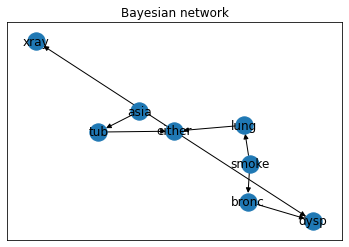

In [17]:
hc_est.show()

In [18]:
hc_est.result_dag.edges


OutEdgeView([('smoke', 'bronc'), ('smoke', 'lung'), ('bronc', 'dysp'), ('lung', 'either'), ('asia', 'tub'), ('tub', 'either'), ('either', 'xray'), ('either', 'dysp')])

In [19]:
hc_est.result_dag-ground_truth

0